In [1]:
#Reading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
Heart_Data= pd.read_csv('Heart_Disease_Prediction.csv')
X = Heart_Data.iloc[:,:-1].values
y = Heart_Data.iloc[:,-1].values

In [2]:
Heart_Data.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0         7      Presence  
3                        1         7       Absence  
4                        1         3       Absence

In [3]:
Heart_Data.describe()

Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min        0.000000     0.000000   71.000000         0.000000        0.00000   
25%        0.000000     0.000000  133.000000         0.000000        0.00000   
50%        0.000000     2.000000  153.500000         0.000000        0.80000   
75%        0.000000     2.000000  166.000000         1.000000        1.60000   
max        1.000000     2.000000  202.000000         1.000000        6.20000   

       Slope of ST  Number of vessels fluro    Thallium  
count   270.000000               270.000000  270.000000  
mean      1.585185                 0.670370    4.696296  
std       0.614390                 0.943896    1.940659  
min       1.000000                 0.000000    3.000000  
25%       1.000000                 0.000000    3.000000  
50%       2.000000                 0.000000    3.000000  
75%       2.000000                 1.000000    7.000000  
max       3.000000                 3.000000    7.000000

In [4]:
Heart_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
#Data Cleaning checking for Null /na 
print(Heart_Data.isnull().sum())
print("-----------------------")
print(Heart_Data.isna().any().sum())
print("-----------------------")

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64
-----------------------
0
-----------------------


In [6]:
#p 4: Standardization and Normalization
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
Heart_Data['target']= label_encoder.fit_transform(Heart_Data['Heart Disease']) 
  
Heart_Data ['target']

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: target, Length: 270, dtype: int32

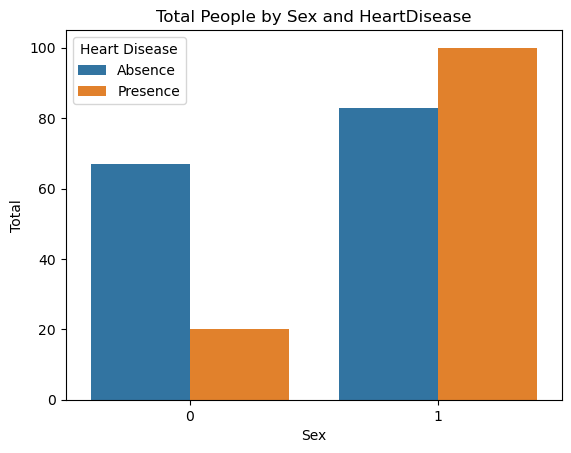

In [7]:
df_heart = Heart_Data.groupby(['Sex','Heart Disease'])['Sex'].count().reset_index(name='Total')
sns.barplot(data=df_heart,x='Sex',y='Total',hue='Heart Disease')
plt.title('Total People by Sex and HeartDisease');


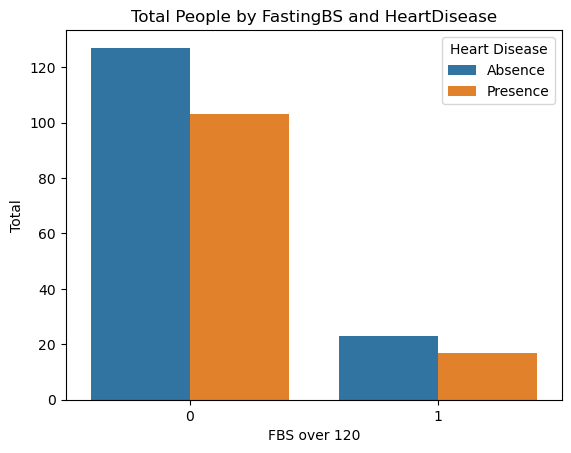

In [8]:
df_fasting_heart = Heart_Data.groupby(['FBS over 120','Heart Disease'])['FBS over 120'].count().reset_index(name='Total')
sns.barplot(data=df_fasting_heart,x='FBS over 120',y='Total',hue='Heart Disease')
plt.title('Total People by FastingBS and HeartDisease');

In [9]:
import plotly.express as px
def plot_age_with_x(x):
    fig = px.scatter(Heart_Data,x=x,y='Age',color='Heart Disease')
    fig.update_layout(title= f'Age vs {x}')
    fig.show()

plot_age_with_x('Cholesterol')
plot_age_with_x('BP')
plot_age_with_x('Max HR')

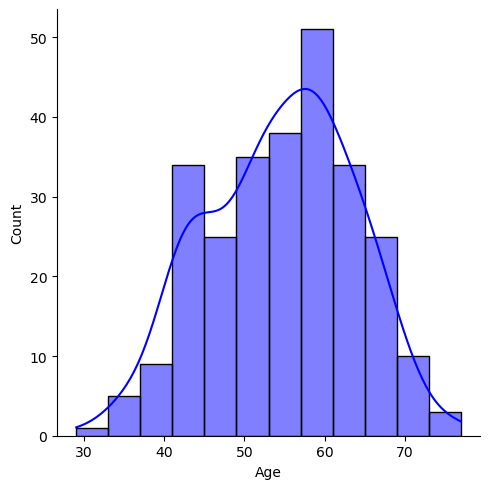

In [10]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:,[3,4]] = imp.fit_transform(X[:,[3,4]])
#sns.displot(Heart_Data['Age'], kde = False
sns.displot(Heart_Data['Age'], kde = True, color = "blue")

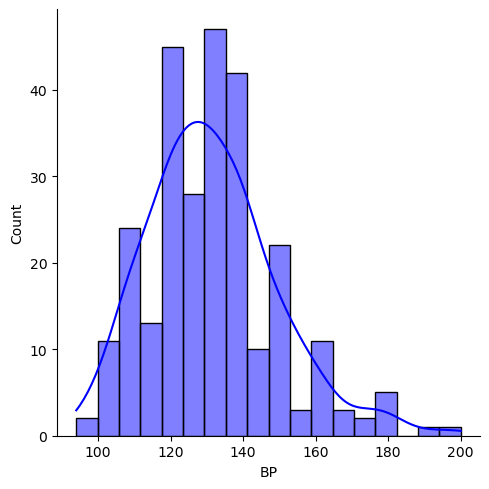

In [11]:
sns.displot(Heart_Data['BP'], kde = True, color = "blue")

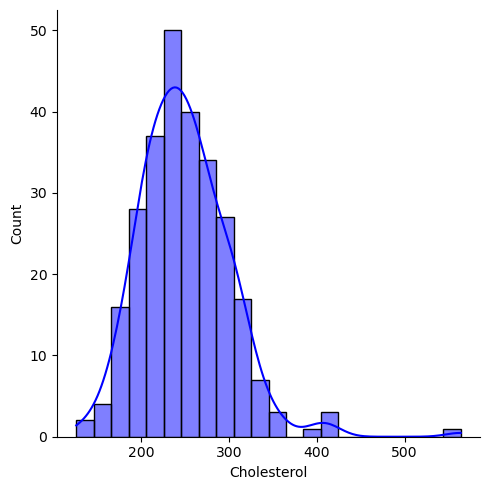

In [12]:
sns.displot(Heart_Data['Cholesterol'], kde = True, color ='blue')

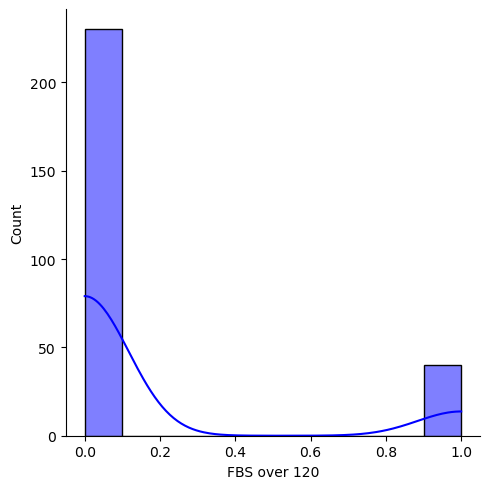

In [13]:
sns.displot(Heart_Data['FBS over 120'], kde = True, color = 'blue')

<Axes: title={'center': 'Gender Distribution'}>

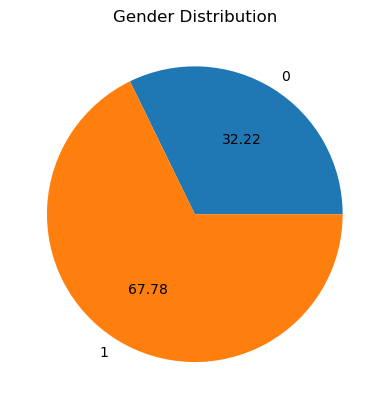

In [14]:
Heart_Data.groupby('Sex').size().plot(kind = 'pie',
                              autopct = "%.2f",
                              title = 'Gender Distribution')

<Axes: >

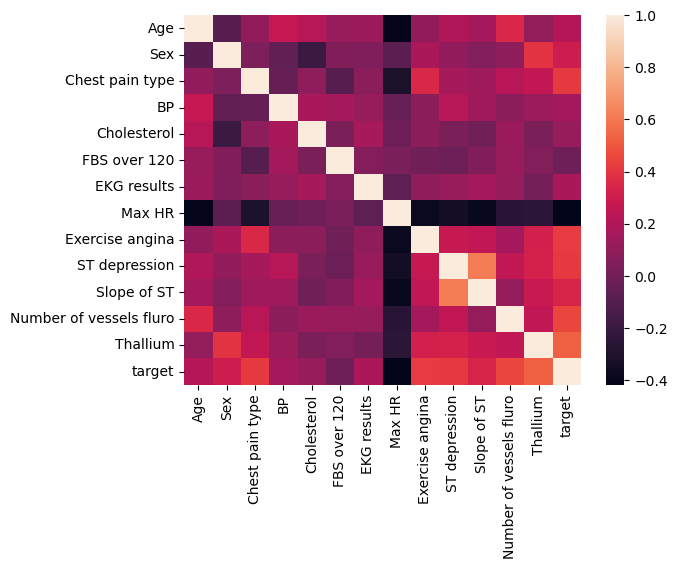

In [15]:
sns.heatmap(Heart_Data.corr())

In [16]:
### Seperating the numeric variable and categorical variable
name = Heart_Data.columns
num_var = ['Age', 'BP', 'Cholesterol', 'Max HR', 'Heart Disease']
cat_var = [item for item in name if item not in num_var]

num_var_data = Heart_Data[Heart_Data.columns & num_var]
num_var_data.describe()

Age          BP  Cholesterol      Max HR
count  270.000000  270.000000   270.000000  270.000000
mean    54.433333  131.344444   249.659259  149.677778
std      9.109067   17.861608    51.686237   23.165717
min     29.000000   94.000000   126.000000   71.000000
25%     48.000000  120.000000   213.000000  133.000000
50%     55.000000  130.000000   245.000000  153.500000
75%     61.000000  140.000000   280.000000  166.000000
max     77.000000  200.000000   564.000000  202.000000

<Axes: >

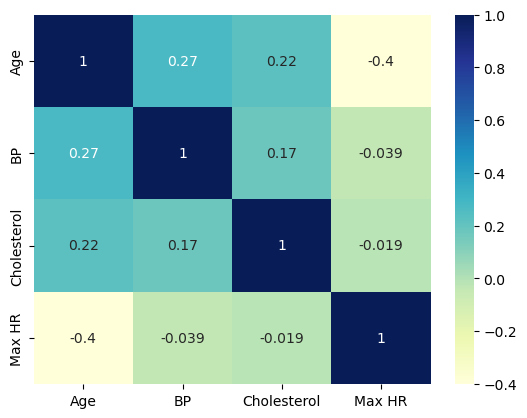

In [17]:
sns.heatmap(num_var_data.corr(), cmap="YlGnBu", annot=True)

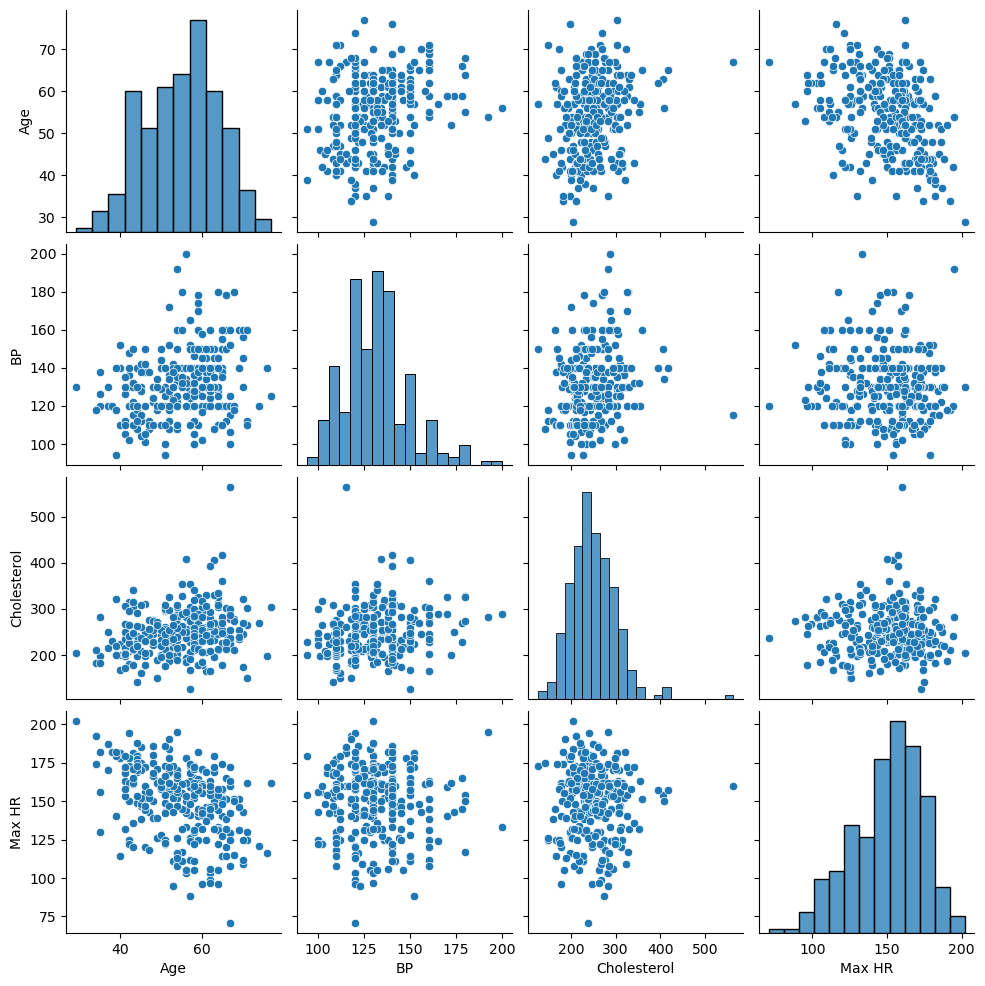

In [18]:
sns.pairplot(num_var_data)

In [19]:
num_var_data[num_var_data['Cholesterol'] > 500]

Age   BP  Cholesterol  Max HR Heart Disease
1   67  115          564     160       Absence

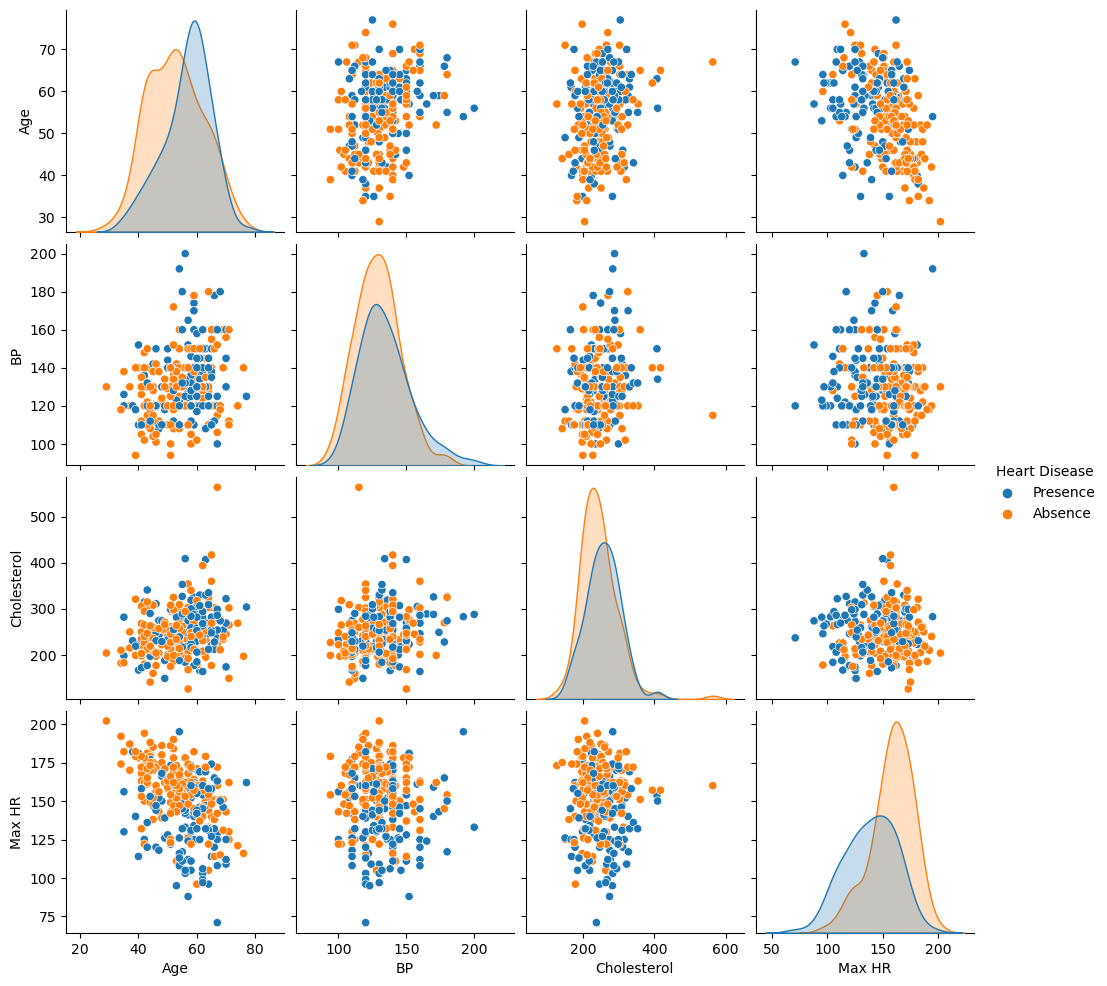

In [20]:
sns.pairplot(num_var_data, hue = 'Heart Disease')

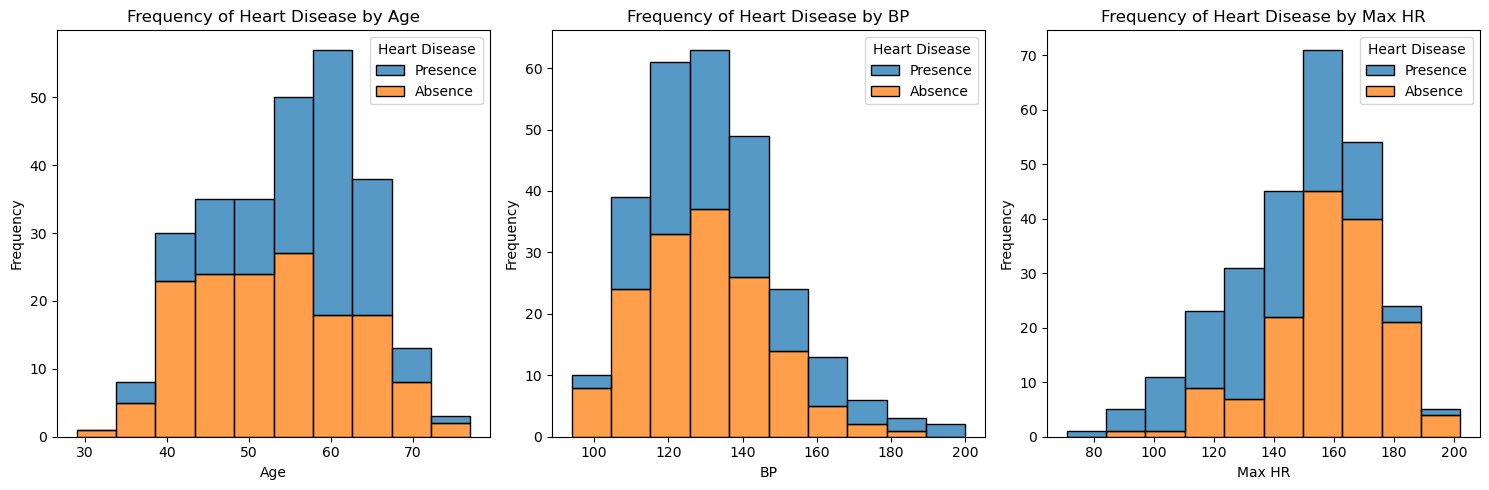

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# สร้าง Histogram Plot แรก
sns.histplot(data=Heart_Data, x='Age', hue='Heart Disease', bins=10, multiple='stack', ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Heart Disease by Age')

# สร้าง Histogram Plot ที่สอง
sns.histplot(data=Heart_Data, x='BP', hue='Heart Disease', bins=10, multiple='stack', ax=axes[1])
axes[1].set_xlabel('BP')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Heart Disease by BP')

# สร้าง Histogram Plot ที่สาม
sns.histplot(data=Heart_Data, x='Max HR', hue='Heart Disease', bins=10, multiple='stack', ax=axes[2])
axes[2].set_xlabel('Max HR')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Frequency of Heart Disease by Max HR')

plt.tight_layout()
plt.show()


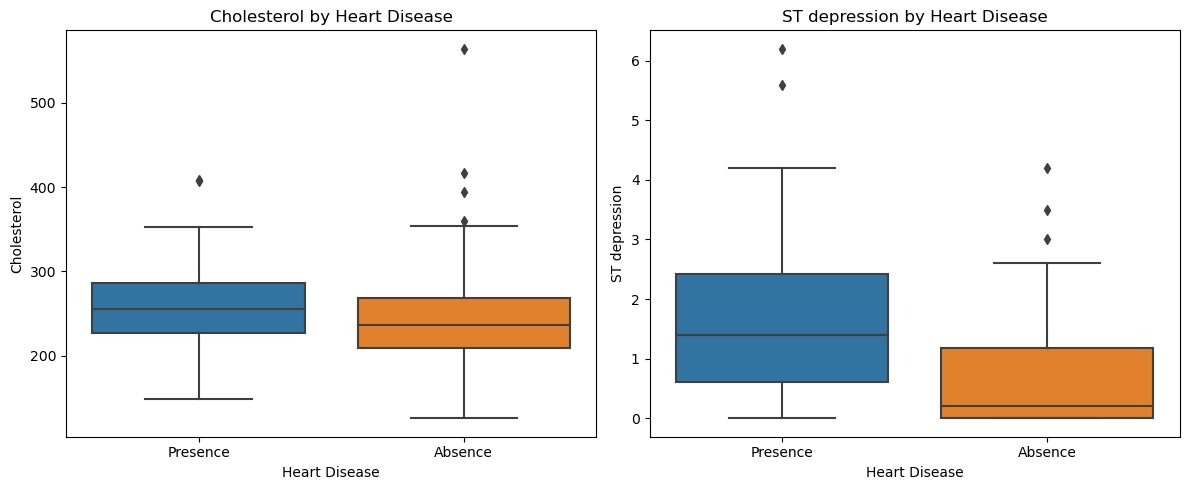

In [22]:
 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=Heart_Data, x="Heart Disease", y="Cholesterol", ax=axes[0])
axes[0].set_xlabel('Heart Disease')
axes[0].set_ylabel('Cholesterol')
axes[0].set_title('Cholesterol by Heart Disease')

 
sns.boxplot(data=Heart_Data, x="Heart Disease", y="ST depression", ax=axes[1])
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('ST depression')
axes[1].set_title('ST depression by Heart Disease')

plt.tight_layout()
plt.show()

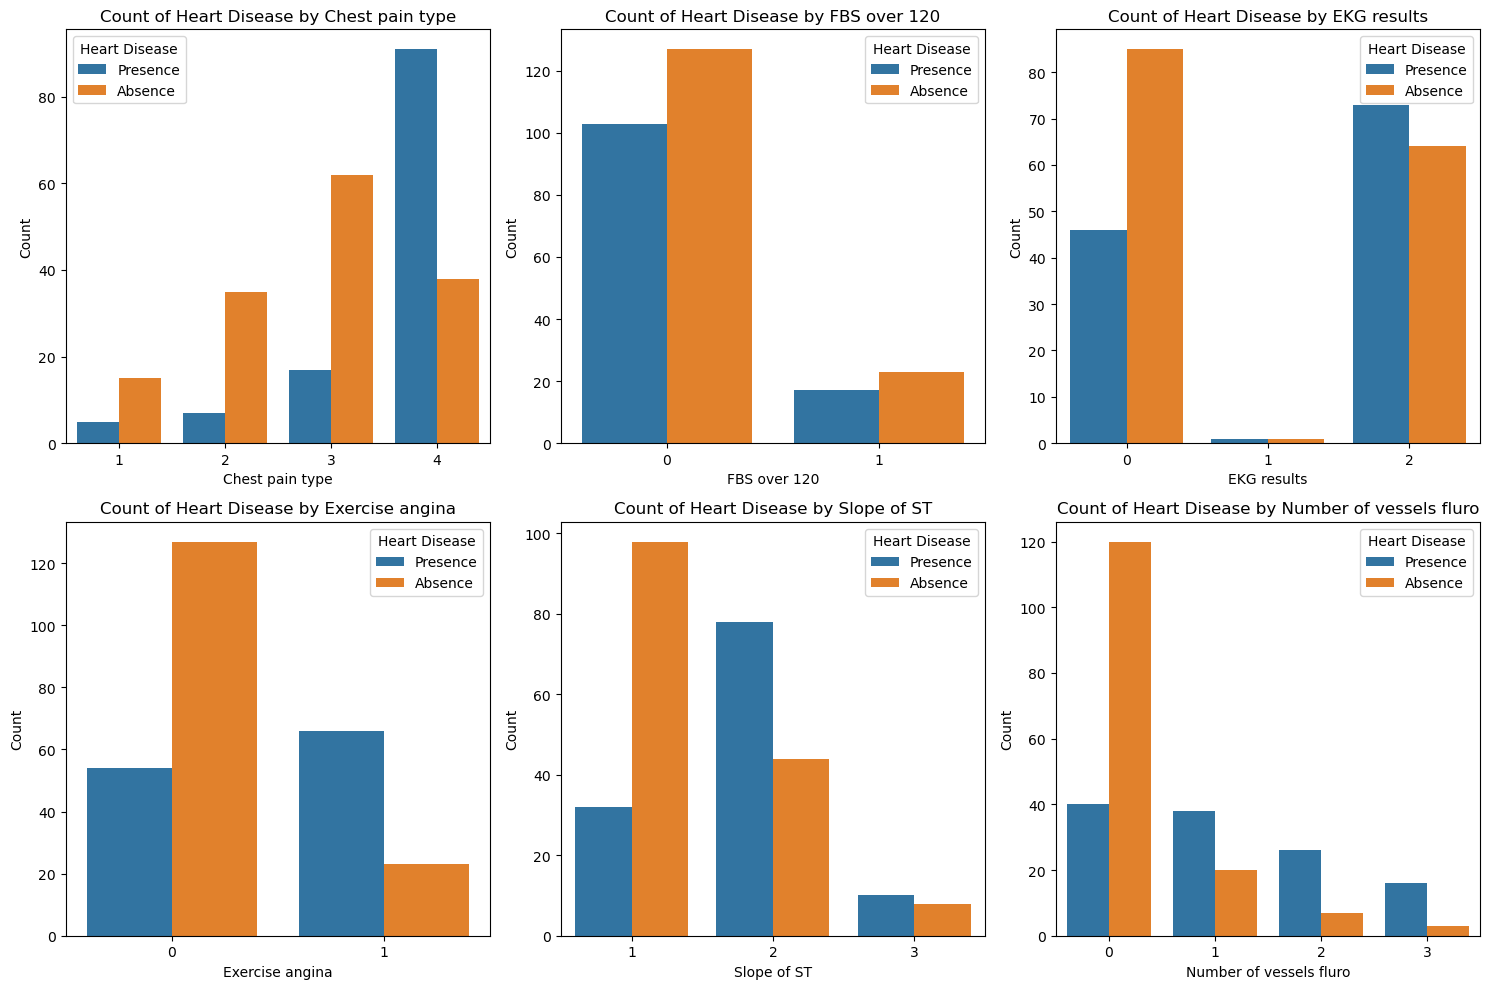

In [23]:
 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
 
sns.countplot(data=Heart_Data, x='Chest pain type', hue='Heart Disease', ax=axes[0, 0])
axes[0, 0].set_xlabel('Chest pain type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Count of Heart Disease by Chest pain type')

 
sns.countplot(data=Heart_Data, x='FBS over 120', hue='Heart Disease', ax=axes[0, 1])
axes[0, 1].set_xlabel('FBS over 120')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Count of Heart Disease by FBS over 120')

 
sns.countplot(data=Heart_Data, x='EKG results', hue='Heart Disease', ax=axes[0, 2])
axes[0, 2].set_xlabel('EKG results')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Count of Heart Disease by EKG results')
 
sns.countplot(data=Heart_Data, x='Exercise angina', hue='Heart Disease', ax=axes[1, 0])
axes[1, 0].set_xlabel('Exercise angina')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Count of Heart Disease by Exercise angina')

 
sns.countplot(data=Heart_Data, x='Slope of ST', hue='Heart Disease', ax=axes[1, 1])
axes[1, 1].set_xlabel('Slope of ST')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Count of Heart Disease by Slope of ST')

 
sns.countplot(data=Heart_Data, x='Number of vessels fluro', hue='Heart Disease', ax=axes[1, 2])
axes[1, 2].set_xlabel('Number of vessels fluro')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('Count of Heart Disease by Number of vessels fluro')

plt.tight_layout()
plt.show()

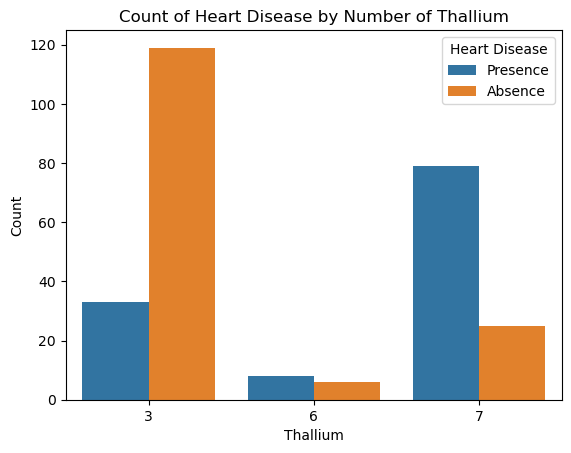

In [24]:
sns.countplot(data=Heart_Data, x='Thallium', hue='Heart Disease')
plt.xlabel('Thallium')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Number of Thallium')
plt.show()

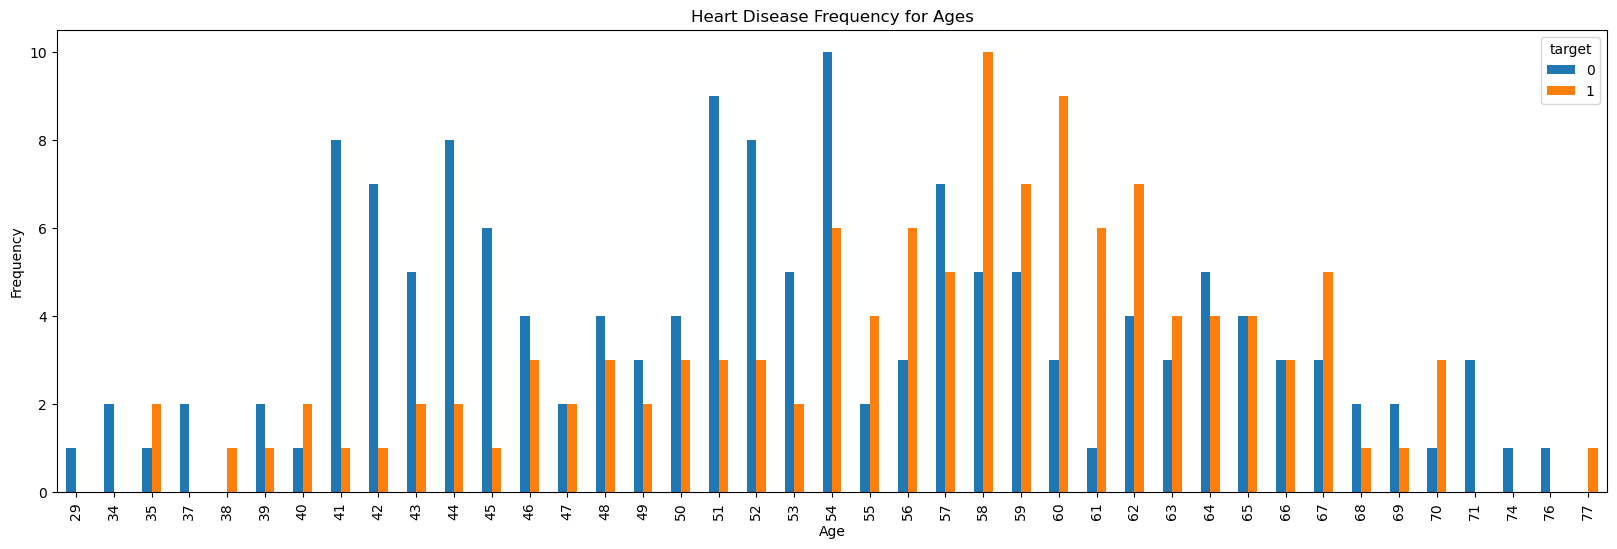

In [25]:
pd.crosstab(Heart_Data.Age,Heart_Data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [26]:
Heart_Data

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  \
0       109                0            2.4            2   
1       160                0            1.6            2   
2       141                0            0.3            1   
3       105                1            0.2            2   
4       121                1            0.2            1   
..      ...              ...            ...          ...   
265     162                0            0.5            1   
266     173                0            0.0            1   
267     153                0            1.3            2   
268     148                0            0.4            2   
269     108                1            1.5            2   

     Number of vessels fluro  Thallium Heart Disease  target  
0                          3         3      Presence       1  
1                          0         7       Absence       0  
2                          0         7      Presence       1  
3                          1         7       Absence       0  
4                          1         3       Absence       0  
..                       ...       ...           ...     ...  
265                        0         7       Absence       0  
266                        0         7       Absence       0  
267                        0         3       Absence       0  
268                        0         6       Absence       0  
269                        3         3      Presence       1  

[270 rows x 15 columns]

In [27]:
Heart_Data.shape

(270, 15)

In [28]:
import sys
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
#print('Keras: {}'.format(keras.__version__))

Python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.5.3
Numpy: 1.23.5
Sklearn: 1.2.2
Matplotlib: 3.7.1


In [29]:
 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
Heart_Data

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  \
0       109                0            2.4            2   
1       160                0            1.6            2   
2       141                0            0.3            1   
3       105                1            0.2            2   
4       121                1            0.2            1   
..      ...              ...            ...          ...   
265     162                0            0.5            1   
266     173                0            0.0            1   
267     153                0            1.3            2   
268     148                0            0.4            2   
269     108                1            1.5            2   

     Number of vessels fluro  Thallium Heart Disease  target  
0                          3         3      Presence       1  
1                          0         7       Absence       0  
2                          0         7      Presence       1  
3                          1         7       Absence       0  
4                          1         3       Absence       0  
..                       ...       ...           ...     ...  
265                        0         7       Absence       0  
266                        0         7       Absence       0  
267                        0         3       Absence       0  
268                        0         6       Absence       0  
269                        3         3      Presence       1  

[270 rows x 15 columns]

In [31]:
# X = np.array(Heart_Data.drop(['target','Heart Disease']))
# y = np.array(Heart_Data['target'])

nn_df= Heart_Data.drop(['target','Heart Disease'],1)
nn_df
X_data=np.array(nn_df)
Y_data=np.array(Heart_Data['target'])

In [32]:
Y_data.shape

(270,)

In [33]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_data, Y_data, stratify=y, random_state=4, test_size = 0.32)

In [34]:
print(y_train.shape) 
print(y_test.shape)

(183,)
(87,)


In [35]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                224       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
# fit the binary model on the training data
 
history_b=binary_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10)

Epoch 1/100
19/19 [==============================] - 1s 22ms/step - loss: 0.7598 - accuracy: 0.5410 - val_loss: 0.6979 - val_accuracy: 0.5517
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7189 - accuracy: 0.5082 - val_loss: 0.6904 - val_accuracy: 0.5632
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.7225 - accuracy: 0.5082 - val_loss: 0.6832 - val_accuracy: 0.5632
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.7217 - accuracy: 0.4809 - val_loss: 0.6888 - val_accuracy: 0.5402
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6900 - accuracy: 0.5410 - val_loss: 0.6866 - val_accuracy: 0.5517
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.7006 - accuracy: 0.5301 - val_loss: 0.6846 - val_accuracy: 0.5517
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7042 - accuracy: 0.5410 - val_loss: 0.6905 - val_accuracy: 0.5517
Epoch 8/100


Epoch 59/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5288 - accuracy: 0.7760 - val_loss: 0.3990 - val_accuracy: 0.8506
Epoch 60/100
19/19 [==============================] - 0s 7ms/step - loss: 0.5083 - accuracy: 0.7760 - val_loss: 0.3534 - val_accuracy: 0.8966
Epoch 61/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5186 - accuracy: 0.7814 - val_loss: 0.4301 - val_accuracy: 0.7931
Epoch 62/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5168 - accuracy: 0.7541 - val_loss: 0.5284 - val_accuracy: 0.7356
Epoch 63/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5211 - accuracy: 0.7705 - val_loss: 0.4977 - val_accuracy: 0.7586
Epoch 64/100
19/19 [==============================] - 0s 5ms/step - loss: 0.5305 - accuracy: 0.7432 - val_loss: 0.4067 - val_accuracy: 0.8621
Epoch 65/100
19/19 [==============================] - 0s 6ms/step - loss: 0.5377 - accuracy: 0.7650 - val_loss: 0.4193 - val_accuracy: 0.8506
Epoch 

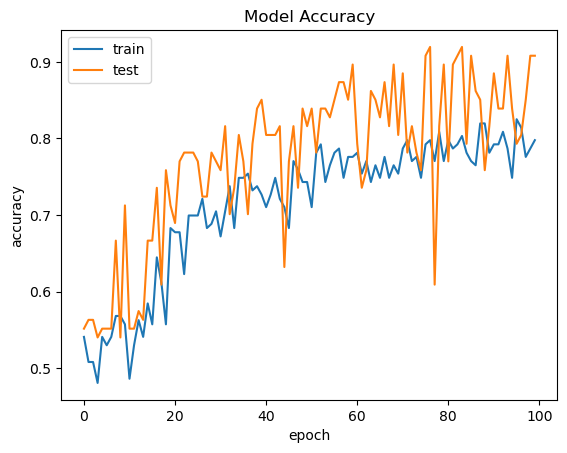

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history_b.history['accuracy'])
plt.plot(history_b.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [38]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

3/3 [==============================] - 0s 2ms/step
Results for Categorical Model
0.5517241379310345
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        48
           1       0.00      0.00      0.00        39

    accuracy                           0.55        87
   macro avg       0.28      0.50      0.36        87
weighted avg       0.30      0.55      0.39        87

